# Fourier Transforms in 2D
Fourier Analysis offers a way to analyse images in terms of their frequency components. This is important in image processing, as it can offer a better description of an image rather than to say sharp/blury or clear/noisy. Furthermore fourier transfomrs are an important tool to understand how different filters work in the frequency domain. 

## Aims
- To compute the 2D fourier transform of basic images
- To understand how different image features (edges, lines, gradients) are represented in the frequency domain

## Theory

A 2D Fourier Transform or a discrtete Fourier Transform (DFT) transforms a 2D signal (like an image) from the spartial domain to the frequency domain. The 2D Fourier transform of an image does not have a an analytic result (the result is a table of values rather than an analytic expression as in the 1D case), it however possible to visualise the results of a 2D fourier transform. The DFT is similarly to the 1D case :

$$F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) e^{-2\pi i \left(\frac{ux}{M} + \frac{vy}{N}\right)}$$

and its inverse is given by:

$$f(x, y) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u, v) e^{2\pi i \left(\frac{ux}{M} + \frac{vy}{N}\right)}$$

Where $f(x,y)$ is the input image, $F(u,v)$ is the fourier transform of the image, and $M$ and $N$ are the dimensions of the image. The variables $x$ and $y$ are the spatial coordinates, while $u$ and $v$ are the frequency coordinates.

## Load image
First 4 basic images were loaded and there fourier transforms were analyzed.

In [1]:
from torchvision import transforms
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Load images
folder = 'Images/'
images = ['LongLine.png', 'ShortLine.png', 'BigSquare.png', 'SmallSquare.png']
img_tensors = []

for image in images:
    image_path = folder + image  # Replace with your image path
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Grayscale(),  # Convert to grayscale
        transforms.ToTensor()  # Resize to 64x64 for simplicity
    ])
    img_tensor = transform(image).squeeze()  # Remove channel dimension if grayscale
    img_tensors.append(img_tensor)

ModuleNotFoundError: No module named 'torchvision'

## Displaying Images

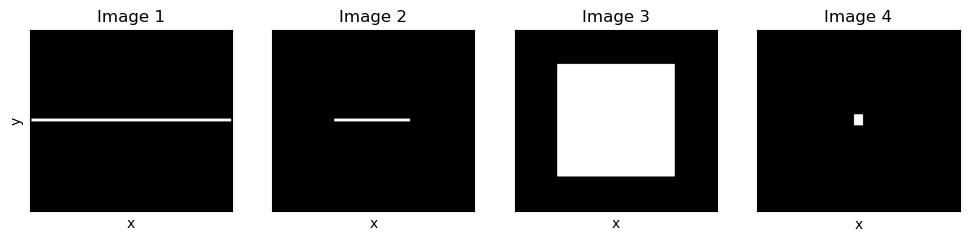

In [2]:
# Display the images
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharex = True)
ax[0].set_ylabel('y')

for i in range(4):
    ax[i].imshow(img_tensors[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].title.set_text(f'Image {i+1}')
    ax[i].set_xlabel('x')
    
plt.show()

## Hypothesizing Fourier transform results
- **Image 1:** A thin horizontal line along the entire x-axis is made up from a single component with a frequency of 0. Much like a 1D fourier transform the fourier transform of this should be a bright central line along the u-axis (the x frequency axis).
- **Image 2:** A thin horizontal line along part of the x-axis is made up from a range of low frequency components. The fourier transform of this should be a bright central line along the u-axis (representing the zero frequency line) but with some width to it. 
- **Image 3:** A large square in the center of the image is made up from a range of low frequency components, due to the sharp edges of the square.
- **Image 4:** A small square in the center of the image is going to be made up from higher frequency components than image 3, since the square is smaller.

## 2D DFT using PyTorch
By applying the fast fourier transform (FFT) function in PyTorch, the 2D DFT of the images were calculated. The FFT function in PyTourch uses the Cooley-Tukey algorithm which has efficency $\mathbb{O}N\log{N}$, significantly faster than direct DFT. It is expected that the DFT of the first image...

In [3]:
img_tensor_fs = []
magnitude_spectrum_tensors = []

for img_tensor in img_tensors:
    img_tensor_f = torch.fft.fftshift(torch.fft.fft2(img_tensor))
    img_tensor_fs.append(img_tensor_f)

## Display results

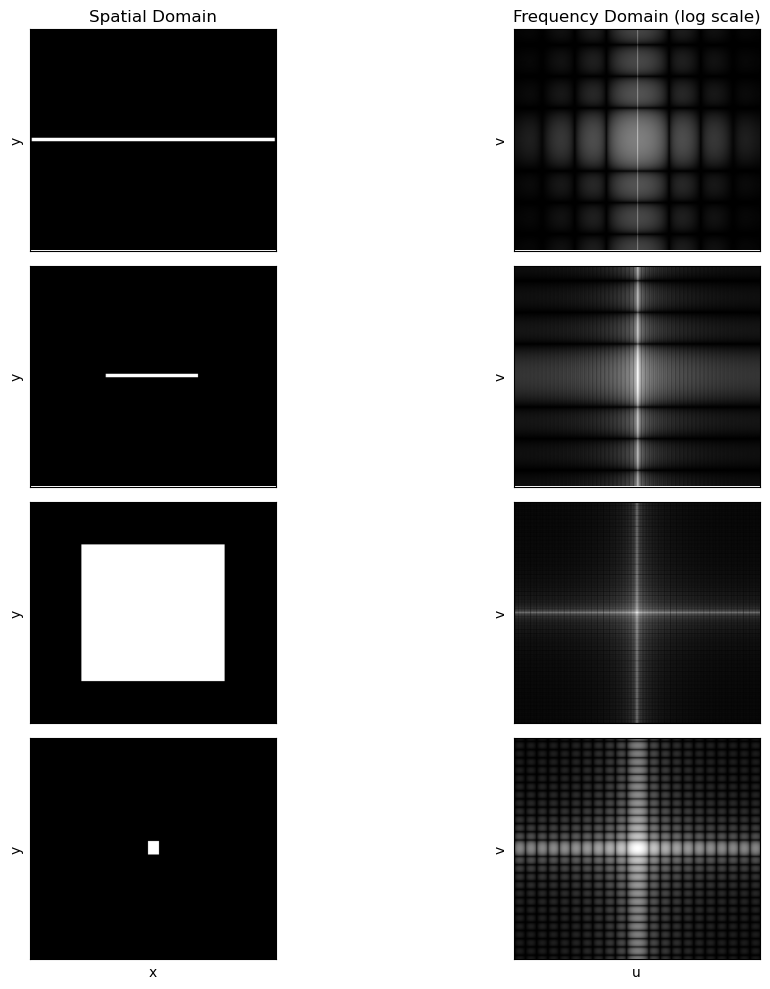

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(12, 10))


ylabels = ['y', 'y', 'y', 'y']
xlabels = ['', '', '', 'x']
freq_xlabels = ['', '', '', 'u']

ax[0, 0].set_title('Spatial Domain')
ax[0, 1].set_title('Frequency Domain (log scale)')

for i in range(4):
    # Spatial domain
    ax[i, 0].imshow(img_tensors[i], cmap='gray')
    ax[i, 0].set_ylabel(ylabels[i])
    ax[i, 0].set_xlabel(xlabels[i])
    ax[i, 0].set_xticks([])
    ax[i, 0].set_yticks([])

    # Frequency domain
    ax[i, 1].imshow(torch.log1p(torch.abs(img_tensor_fs[i])), cmap='gray')
    ax[i, 1].set_ylabel('v')
    ax[i, 1].set_xlabel(freq_xlabels[i])
    ax[i, 1].set_xticks([])
    ax[i, 1].set_yticks([])

fig.tight_layout()
plt.show()

In [5]:
img = torch.zeros(256, 256)

center = 256//2
square_size = 20
half_square = square_size // 2

img[center-half_square:center+half_square+1, 
    center-half_square:center+half_square+1] = 1.0

## Fourier transform of real image

In [6]:
# Forier transformed pigeon
image_path = "Images/pigeon.jpeg"

pigeon = Image.open(image_path)
transform = transforms.Compose([
        transforms.Grayscale(),  # Convert to grayscale
        transforms.Resize((256, 256)), # Resize to 256x256 to speed up processing
        transforms.ToTensor()  
    ])
pigeon_tensor = transform(pigeon).squeeze()  # Remove channel dimension if grayscale
box_tensor = transforms.ToTensor()(img).squeeze()
fft_img_tensor = torch.fft.fftshift(torch.fft.fft2(pigeon_tensor))

fig, ax = plt.subplots(2,1)
ax[0].axis('off')
ax[0].imshow(torch.log1p(torch.abs(fft_img_tensor)), cmap='plasma')
ax[1].axis('off')
ax[1].imshow(pigeon_tensor, cmap='gray')

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

## Results
- For the first two images there are additional low frequency components. This is because the line is not infinitely thin, and so there are some low frequency components to represent the thickness of the line in the $v$ direction (the $y$ frequency axis).
- DFTs mostly align with the predictions. Except for perhaps image 4 where there are more higher frequency components in the $u$ direction than expected. 
## Conclusion
